In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

import ipywidgets

In [3]:
df = pd.read_csv("house_prices.csv")

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
X = df.drop(columns="SalePrice")   # candidatas a feature (variavel preditora)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
index_drop = X_train.query("GrLivArea > 4500").index
index_drop

Index([523, 1298], dtype='int64')

In [6]:
X_train = X_train.drop(index=index_drop)

In [7]:
y_train = y_train.drop(index=index_drop)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

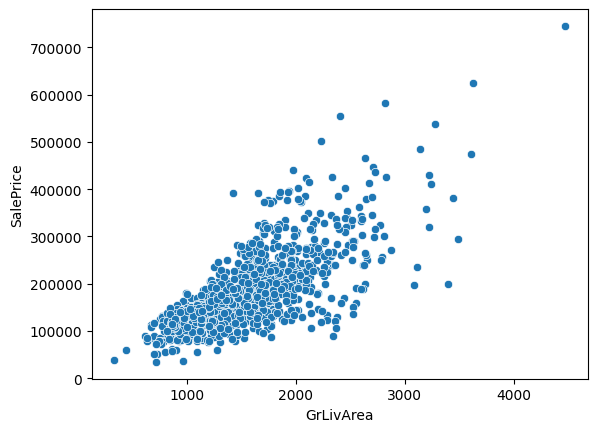

In [8]:
sns.scatterplot(x=X_train["GrLivArea"], y=y_train)

In [9]:
# construção do modelo

X_train_1d = X_train["GrLivArea"]

In [10]:
X_train_1d.values.reshape(-1, 1)

array([[1314],
       [1571],
       [ 796],
       ...,
       [ 864],
       [1426],
       [1555]], dtype=int64)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
modelo = LinearRegression().fit(X_train_1d.values.reshape(-1, 1), y_train)  # treinando o modelo

In [13]:
modelo.intercept_

10895.38004325694

In [14]:
modelo.coef_[0]

112.12517082752618

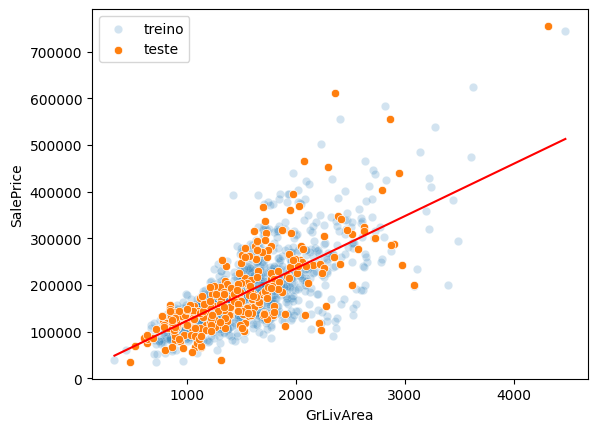

In [15]:
# visualizando o modelo treinado

sns.scatterplot(x=X_train["GrLivArea"], y=y_train, label="treino", alpha=0.2)
sns.scatterplot(x=X_test["GrLivArea"], y=y_test, label="teste")

b0, b1 = modelo.intercept_, modelo.coef_[0]
x = np.linspace(X_train["GrLivArea"].min(), X_train["GrLivArea"].max(), 2)
y = b0 + b1*x

plt.plot(x, y, color="red")

plt.show()

In [16]:
# fazendo algumas previsões

b0, b1 = modelo.intercept_, modelo.coef_[0]

x = 3000
y = b0 + b1*x

y

347270.8925258354

In [17]:
modelo.predict([[x]])

array([347270.89252584])

In [18]:
X_test_1d = X_test["GrLivArea"]

In [19]:
modelo.predict(X_test_1d.values.reshape(-1, 1))[:5]

array([130645.06248705, 304887.57795303, 126160.05565395, 197471.66430026,
       192538.15678385])

In [20]:
y_test.iloc[:5].values

array([154500, 325000, 115000, 159000, 315500], dtype=int64)

In [21]:
X_test_1d[:5].values

array([1068, 2622, 1028, 1664, 1620], dtype=int64)

In [22]:
# avaliação de modelos de regressão

# residuos

y_pred = modelo.predict(X_test_1d.values.reshape(-1, 1))

In [24]:
residuos = y_test - y_pred
residuos

892      23854.937513
1105     20112.422047
413     -11160.055654
522     -38471.664300
1036    122961.843216
            ...      
479     -48237.948249
1361     77553.108591
802      14850.371232
651     -72204.387993
722      16728.472362
Name: SalePrice, Length: 292, dtype: float64

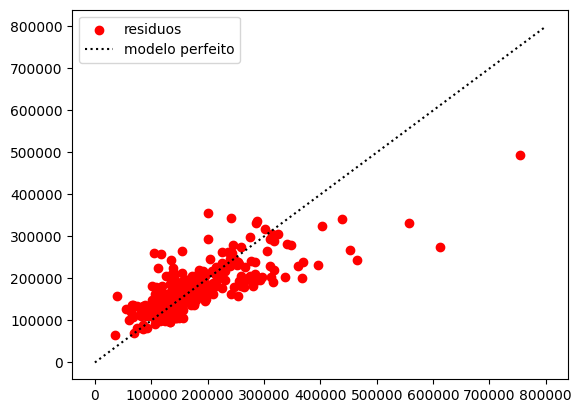

In [28]:
plt.scatter(x=y_test, y=y_pred, color="r", label="residuos")

x = np.linspace(0, 800000, 2)
y = x
plt.plot(x, y, color="k", ls=":", label="modelo perfeito")

plt.legend()
plt.show()

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y_test, y_pred)

0.5675383176324451

<Axes: xlabel='SalePrice', ylabel='Count'>

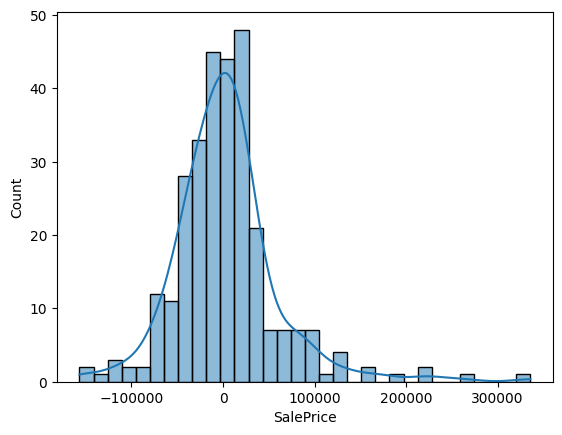

In [32]:
sns.histplot(x=residuos, kde=True)

In [33]:
residuos.describe()

count       292.000000
mean       3376.936012
std       57594.082477
min     -156822.385818
25%      -29205.512403
50%        -176.809412
75%       22218.204254
max      335697.716120
Name: SalePrice, dtype: float64

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [37]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [38]:
print(f"MAE = {MAE:.2f}\nRMSE = {RMSE:.2f}\nMAPE = {MAPE:.2%}")

MAE = 38473.84
RMSE = 57594.46
MAPE = 23.34%
